<a href="https://colab.research.google.com/github/Naveen032006/Computer-vision/blob/main/IMAGE_WITH_NOISE%2C_RESTORING_THE_IMAGE%2C_EDGE_DETECTION_SOBEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

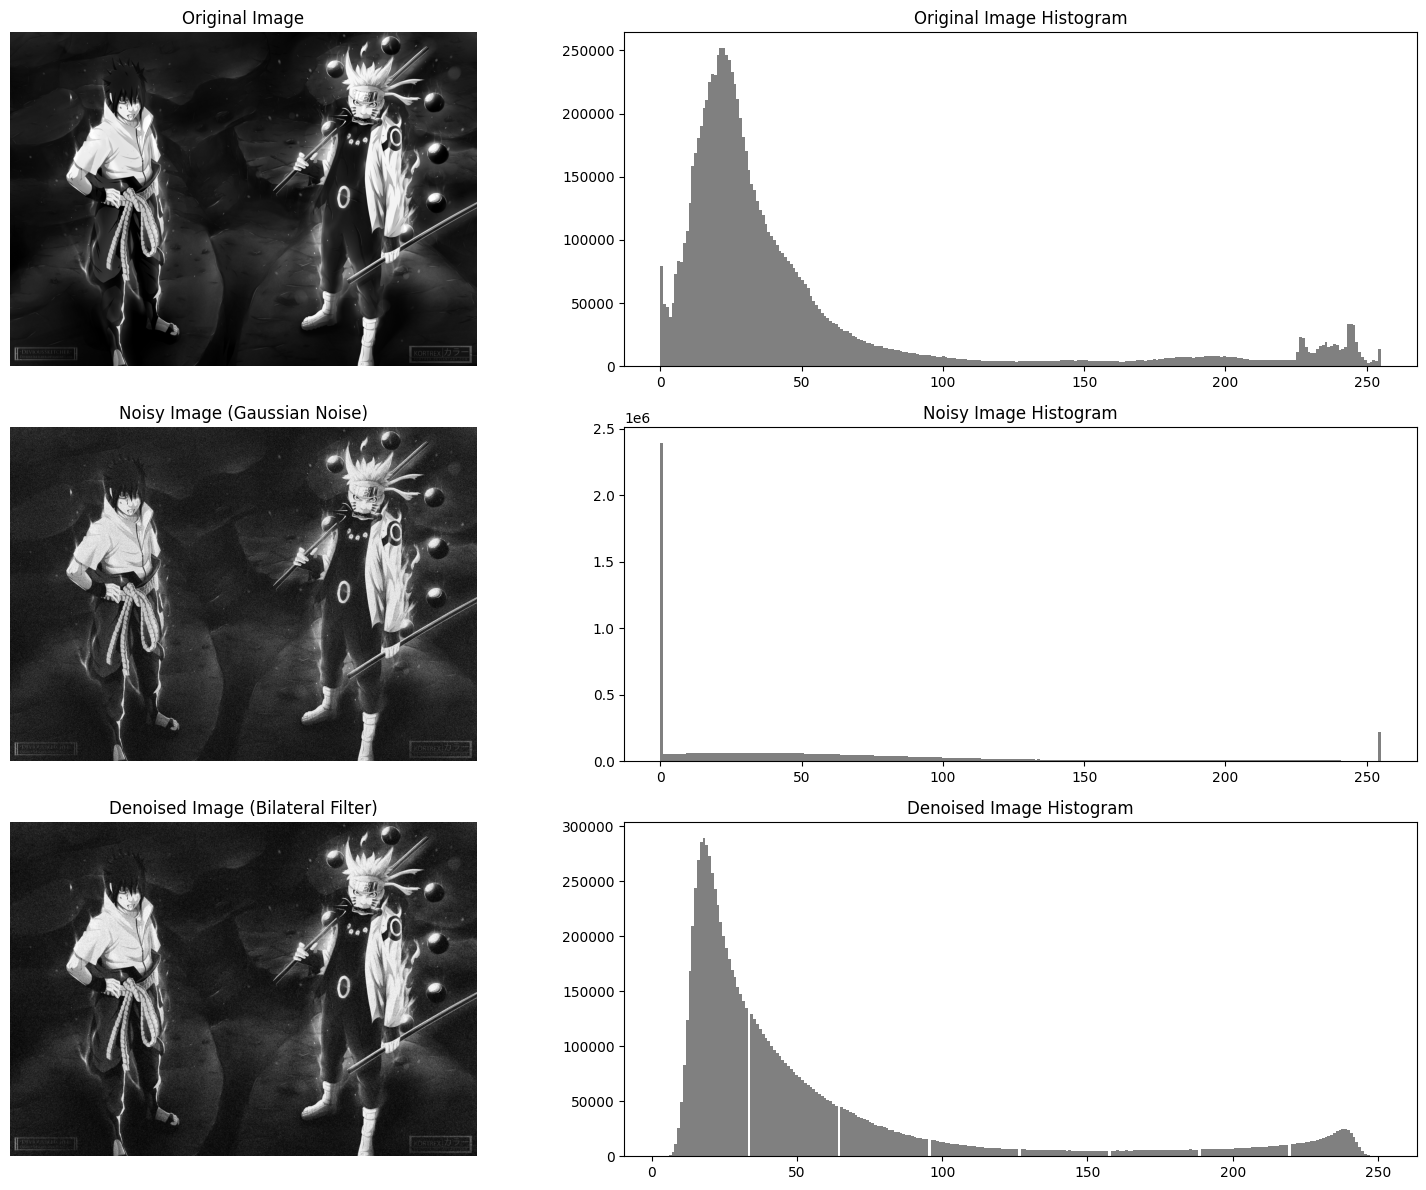

In [1]:
import cv2

import numpy as np

import matplotlib.pyplot as plt


# Load the image in grayscale

img = cv2.imread('naruto.png', cv2.IMREAD_GRAYSCALE)


# Generate Gaussian noise

mean = 0

std = 50

noise = np.random.normal(mean, std, img.shape).astype(np.int16)


# Add noise to the image and clip to valid range [0, 255]

noise_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)


# Apply bilateral filter for denoising

denoised_img = cv2.bilateralFilter(noise_img, 9, 50,50 )


plt.figure(figsize=(16, 12))


plt.subplot(3, 2, 1)

plt.imshow(img, cmap='gray')

plt.title('Original Image')

plt.axis('off')


plt.subplot(3, 2, 2)

plt.hist(img.ravel(), bins=256, color='gray')

plt.title('Original Image Histogram')


# Noisy image and histogram

plt.subplot(3, 2, 3)

plt.imshow(noise_img, cmap='gray')

plt.title('Noisy Image (Gaussian Noise)')

plt.axis('off')


plt.subplot(3, 2, 4)

plt.hist(noise_img.ravel(), bins=256, color='gray')

plt.title('Noisy Image Histogram')


# Denoised image

plt.subplot(3, 2, 5)

plt.imshow(denoised_img, cmap='gray')

plt.title('Denoised Image (Bilateral Filter)')

plt.axis('off')


plt.subplot(3, 2, 6)

plt.hist(denoised_img.ravel(), bins=256, color='gray')

plt.title('Denoised Image Histogram')


plt.tight_layout()

plt.show()

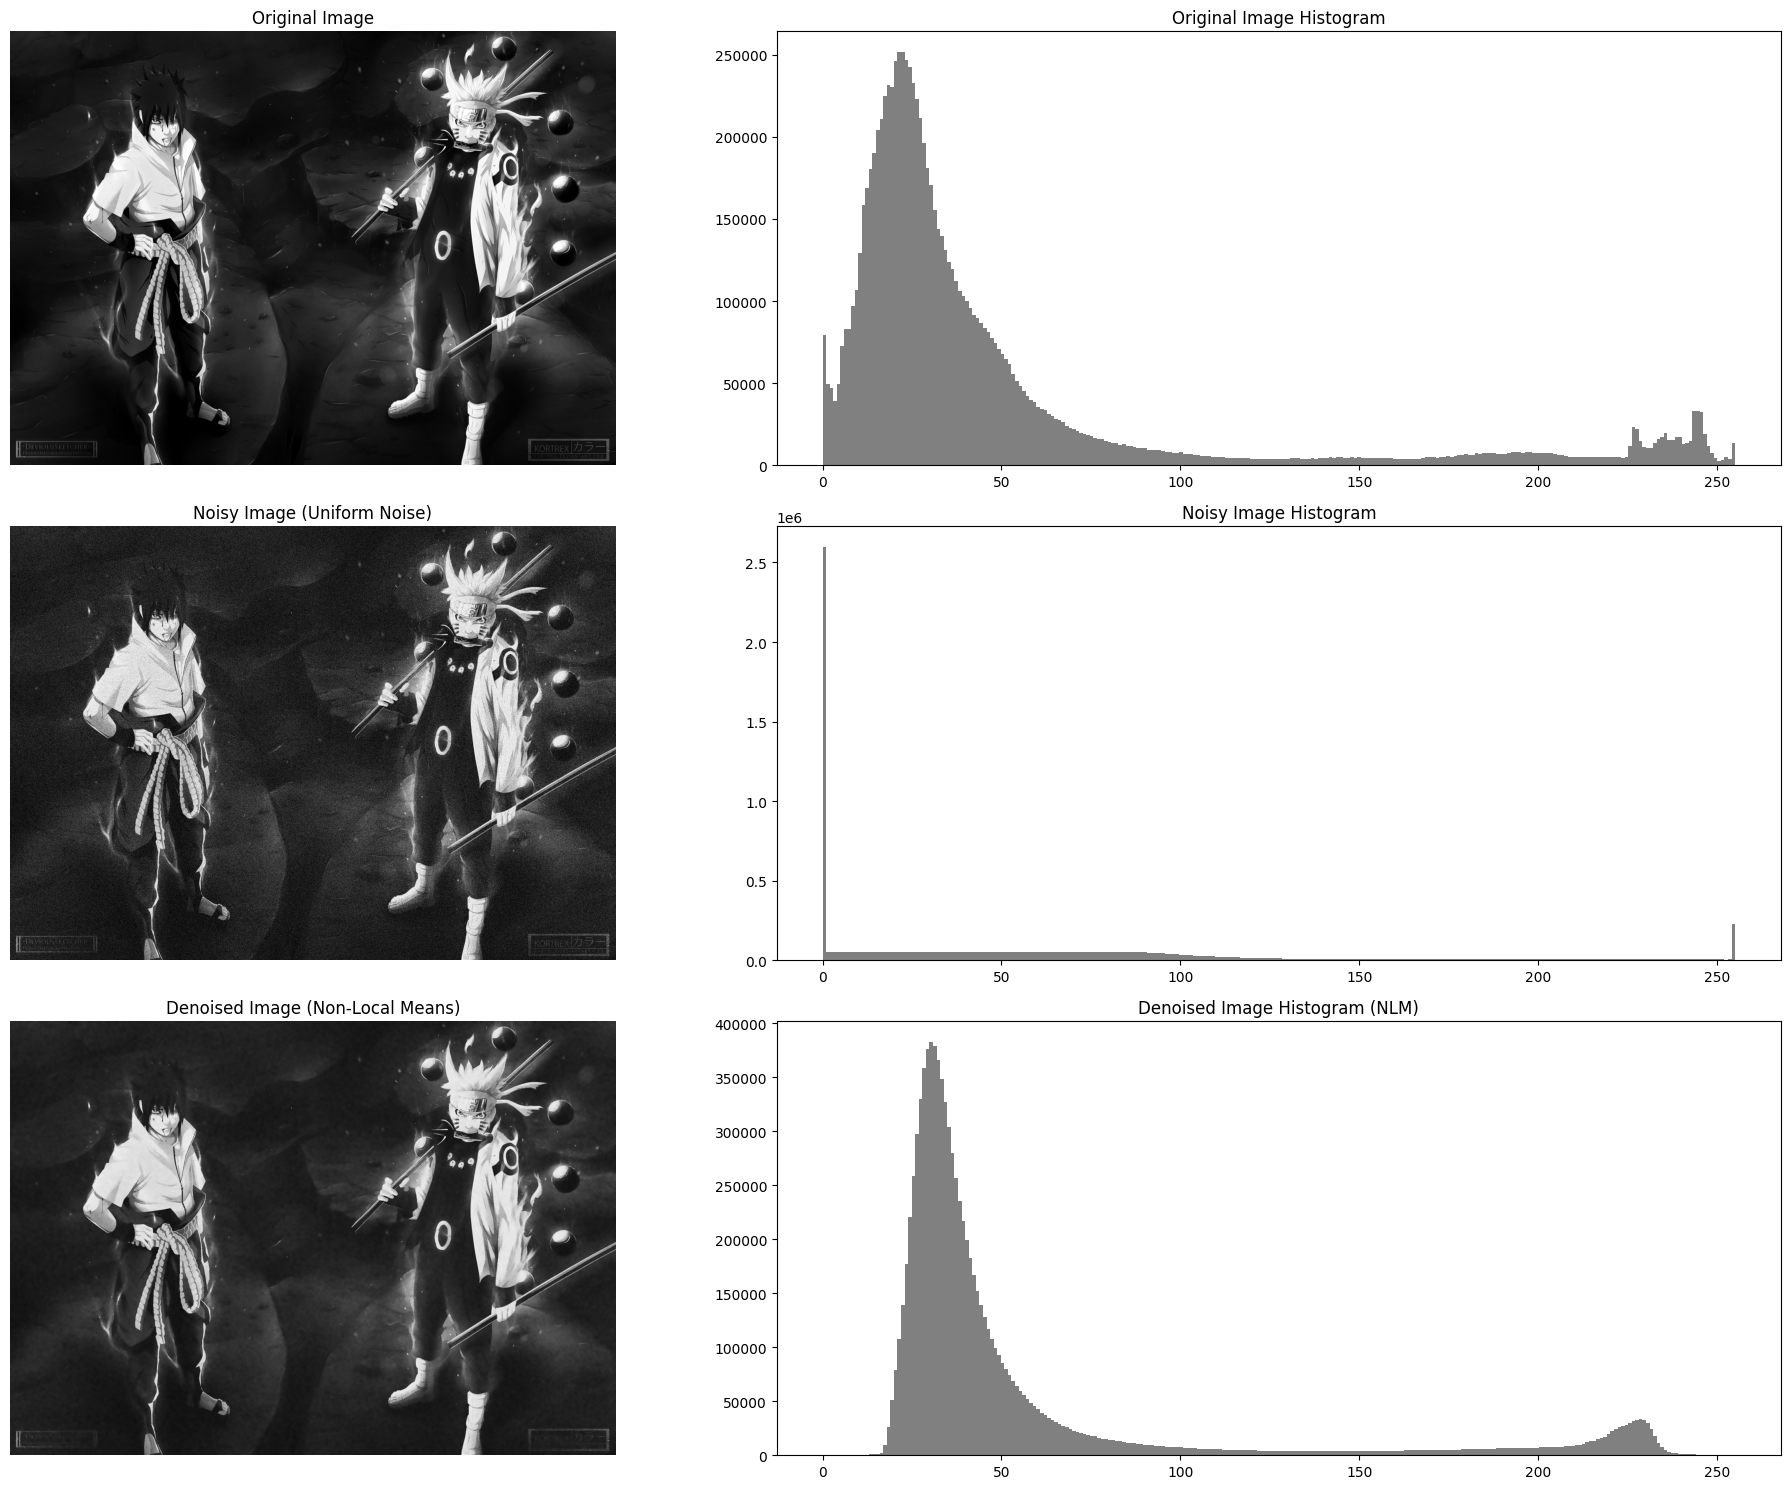

In [2]:
import cv2

import numpy as np

import matplotlib.pyplot as plt


# Load the image in grayscale

img = cv2.imread('naruto.png', cv2.IMREAD_GRAYSCALE)


# Generate stronger uniform noise

noise = np.random.uniform(-80, 80, img.shape).astype(np.int16)

noise_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)


# Apply Non-Local Means Denoising with a higher h value

denoised_nlm = cv2.fastNlMeansDenoising(noise_img, None, h=30, templateWindowSize=7, searchWindowSize=21)



# Plot the images and histograms

plt.figure(figsize=(20, 15))


plt.subplot(3, 2, 1)

plt.imshow(img, cmap='gray')

plt.title('Original Image')

plt.axis('off')


plt.subplot(3, 2, 2)

plt.hist(img.ravel(), bins=256, color='gray')

plt.title('Original Image Histogram')


# Noisy image

plt.subplot(3, 2, 3)

plt.imshow(noise_img, cmap='gray')

plt.title('Noisy Image (Uniform Noise)')

plt.axis('off')


plt.subplot(3, 2, 4)

plt.hist(noise_img.ravel(), bins=256, color='gray')

plt.title('Noisy Image Histogram')


# Non-Local Means Denoised Image

plt.subplot(3, 2, 5)

plt.imshow(denoised_nlm, cmap='gray')

plt.title('Denoised Image (Non-Local Means)')

plt.axis('off')


plt.subplot(3, 2, 6)

plt.hist(denoised_nlm.ravel(), bins=256, color='gray')

plt.title('Denoised Image Histogram (NLM)')


plt.tight_layout()

plt.show()

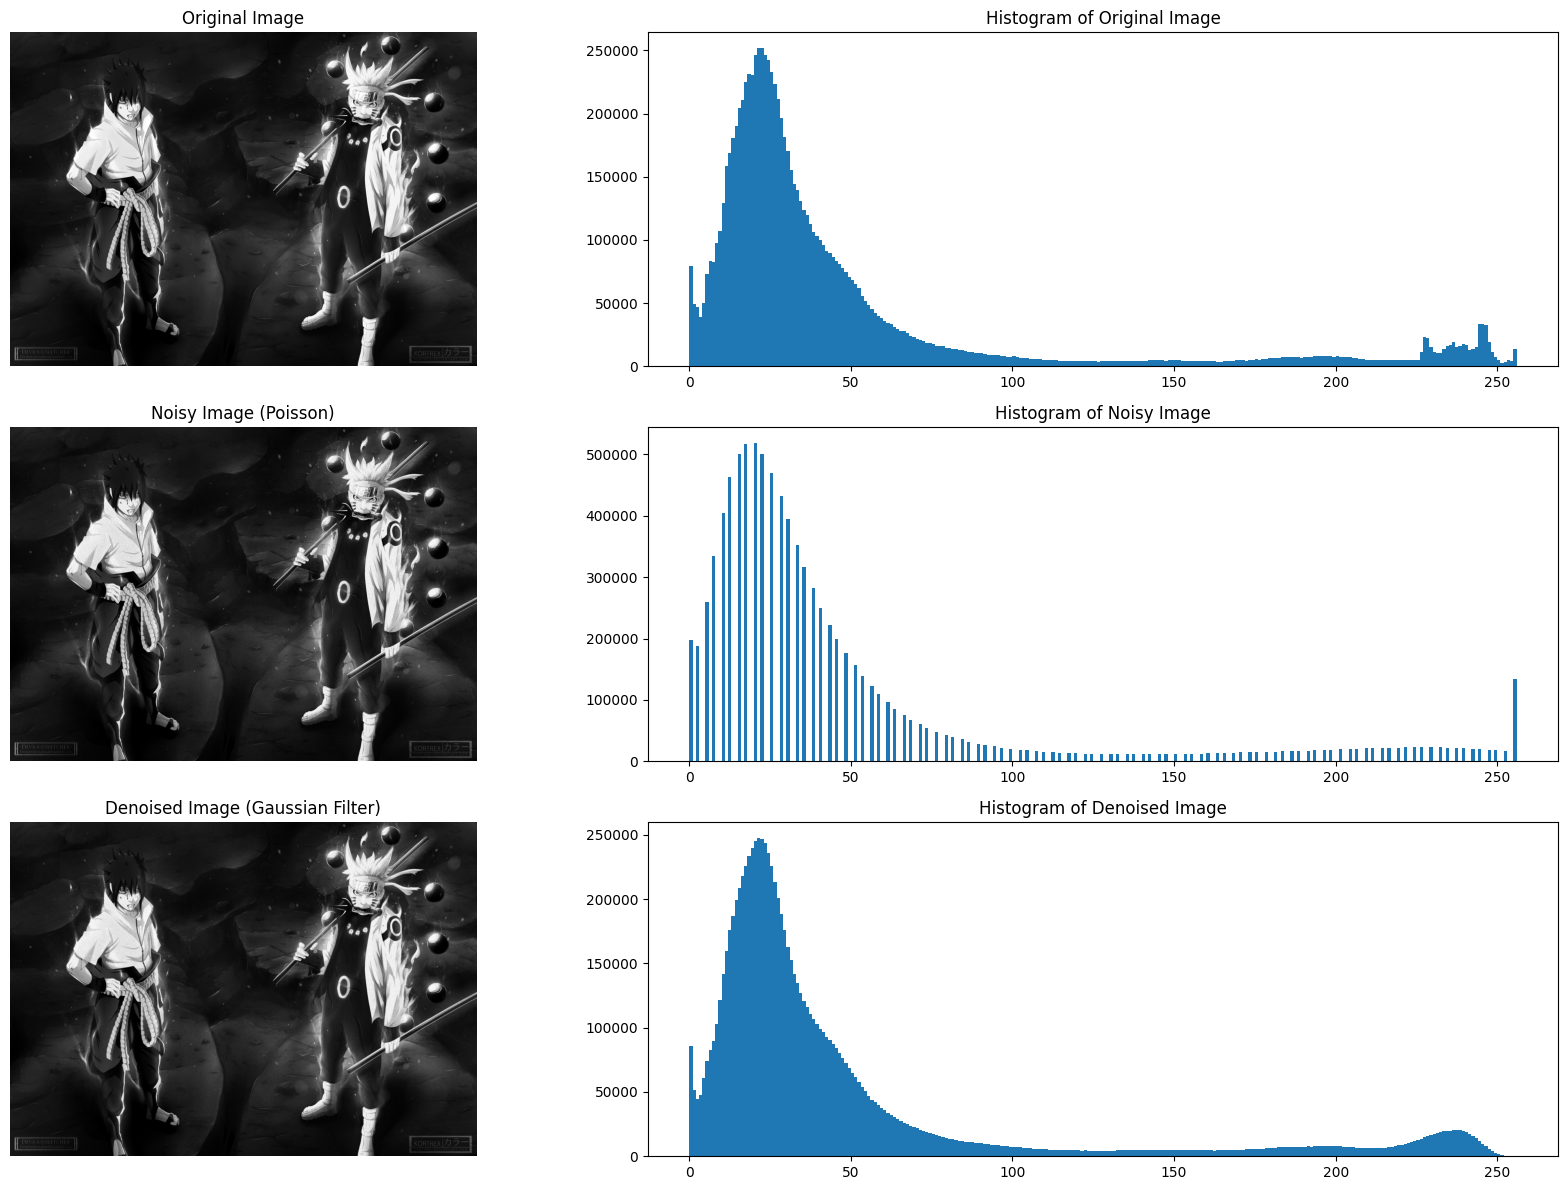

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('naruto.png', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if img is None:
    print("Error: Image not found. Make sure 'naruto.png' is in the working directory.")
    exit()

# Function to add Poisson noise
def add_poisson_noise(image):
    noisy = np.random.poisson(image.astype(np.float32) / 255.0 * 100.0) / 100.0 * 255.0
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Add Poisson noise
poisson_noisy_img = add_poisson_noise(img)

# Remove noise using Gaussian Filter
gaussian_denoised_img = cv2.GaussianBlur(poisson_noisy_img, (5, 5), 0)

# Plot the images and their histograms
plt.figure(figsize=(18, 12))

# Original Image and Histogram
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Original Image')

# Noisy Image (Poisson) and Histogram
plt.subplot(3, 2, 3)
plt.imshow(poisson_noisy_img, cmap='gray')
plt.title('Noisy Image (Poisson)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(poisson_noisy_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Noisy Image')

# Denoised Image (Gaussian Filter) and Histogram
plt.subplot(3, 2, 5)
plt.imshow(gaussian_denoised_img, cmap='gray')
plt.title('Denoised Image (Gaussian Filter)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(gaussian_denoised_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Denoised Image')

plt.tight_layout()
plt.show()


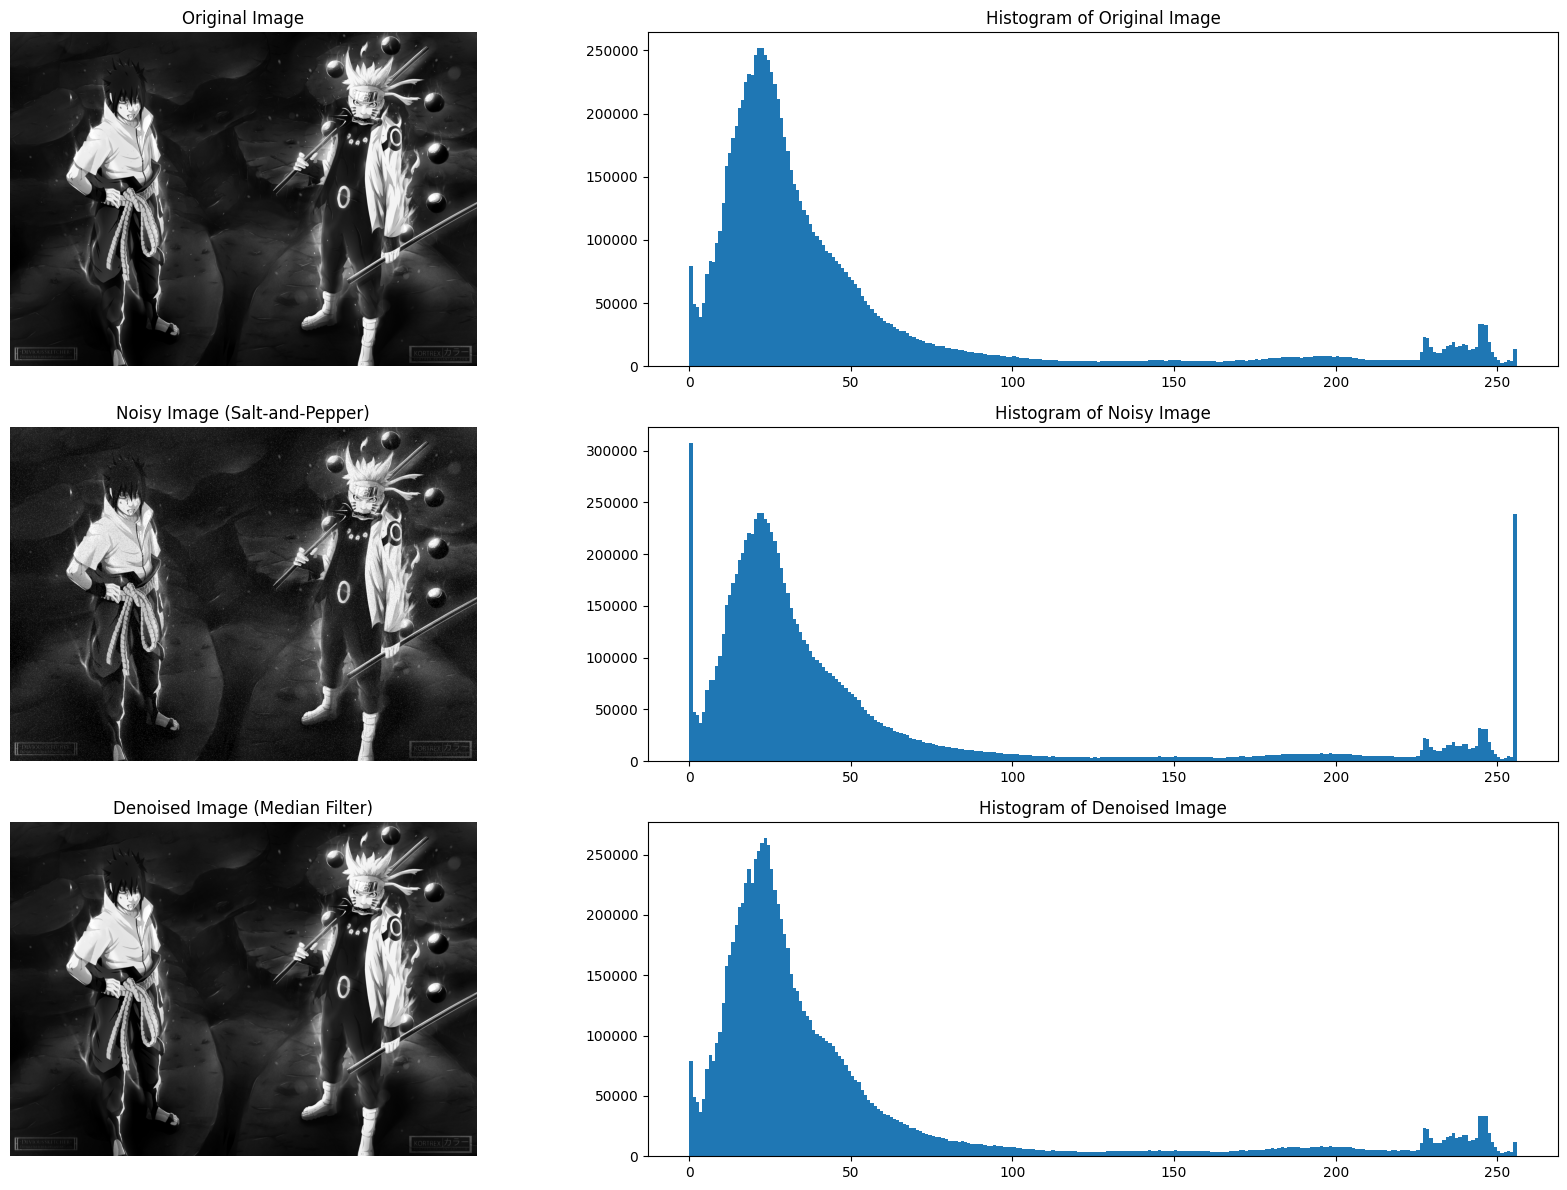

In [7]:
import cv2

import numpy as np

import matplotlib.pyplot as plt


# Load the image in grayscale

img = cv2.imread('naruto.png', cv2.IMREAD_GRAYSCALE)


# Function to add Salt-and-Pepper noise

def add_salt_pepper_noise(image, prob=0.5):

  noisy = image.copy()

  num_salt = int(prob * image.size * 0.5)

  num_pepper = int(prob * image.size * 0.5)


  # Add salt noise (white pixels)

  coords = [np.random.randint(0, i, num_salt) for i in image.shape]

  noisy[coords[0], coords[1]] = 255


  # Add pepper noise (black pixels)

  coords = [np.random.randint(0, i, num_pepper) for i in image.shape]

  noisy[coords[0], coords[1]] = 0


  return noisy


# Apply salt-and-pepper noise

noisy_img = add_salt_pepper_noise(img, prob=0.05)


# Remove noise using Median Filter

denoised_img = cv2.medianBlur(noisy_img, 5)


# Plot the images and their histograms

plt.figure(figsize=(18, 12))


# Original Image and Histogram

plt.subplot(3, 2, 1)

plt.imshow(img, cmap='gray')

plt.title('Original Image')

plt.axis('off')


plt.subplot(3, 2, 2)

plt.hist(img.ravel(), bins=256, range=(0, 256))

plt.title('Histogram of Original Image')


# Noisy Image and Histogram

plt.subplot(3, 2, 3)

plt.imshow(noisy_img, cmap='gray')

plt.title('Noisy Image (Salt-and-Pepper)')

plt.axis('off')


plt.subplot(3, 2, 4)

plt.hist(noisy_img.ravel(), bins=256, range=(0, 256))

plt.title('Histogram of Noisy Image')


# Denoised Image and Histogram

plt.subplot(3, 2, 5)

plt.imshow(denoised_img, cmap='gray')

plt.title('Denoised Image (Median Filter)')

plt.axis('off')


plt.subplot(3, 2, 6)

plt.hist(denoised_img.ravel(), bins=256, range=(0, 256))

plt.title('Histogram of Denoised Image')


plt.tight_layout()

plt.show()

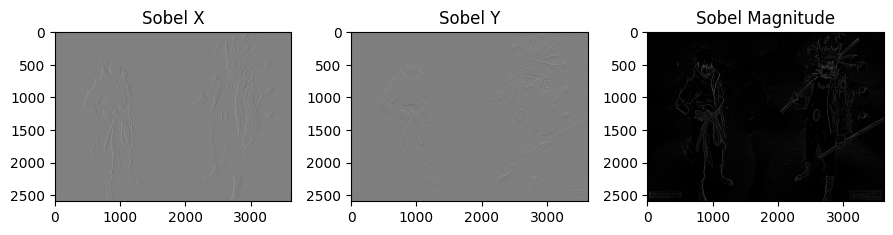

In [8]:
import cv2

import numpy as np

import matplotlib.pyplot as plt


# Load the image in grayscale

image = cv2.imread("naruto.png", cv2.IMREAD_GRAYSCALE)


# Apply Sobel operator

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3) # Gradient in X direction

sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3) # Gradient in Y direction


sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude)) # Normalize to 0-255


histogram, bins = np.histogram(sobel_magnitude.flatten(), bins=256, range=[0, 256])


plt.figure(figsize=(12, 5))


plt.subplot(1, 4, 1), plt.imshow(sobel_x, cmap="gray"), plt.title("Sobel X")

plt.subplot(1, 4, 2), plt.imshow(sobel_y, cmap="gray"), plt.title("Sobel Y")

plt.subplot(1, 4, 3), plt.imshow(sobel_magnitude, cmap="gray"), plt.title("Sobel Magnitude")



plt.tight_layout()

plt.show()